# Introduction

In this micro-course, you'll learn about different methods to wrangle and visualize **geospatial data**, or data with a geographic location.

<center>
<img src="https://storage.googleapis.com/kaggle-media/learn/images/v6ZUGgI.png"><br/>
</center>

Along the way, you'll offer solutions to several real-world problems like:
- Where should a global non-profit expand its reach in remote areas of the Philippines?
- How do purple martins, a threatened bird species, travel between North and South America?  Are the birds travelling to conservation areas?
- Which areas of Japan could potentially benefit from extra earthquake reinforcement?
- Which Starbucks stores in California are strong candidates for the next [Starbucks Reserve Roastery](https://www.forbes.com/sites/garystern/2019/01/22/starbucks-reserve-roastery-its-spacious-and-trendy-but-why-is-starbucks-slowing-down-expansion/#6cb80d4a1bc6) location?
- Does New York City have sufficient hospitals to respond to motor vehicle collisions?  Which areas of the city have gaps in coverage?

You'll also visualize crime in the city of Boston, examine health facilities in Ghana, explore top universities in Europe, and track releases of toxic chemicals in the United States.

In this first tutorial, we'll quickly cover the pre-requisites that you'll need to complete this micro-course.  And, if you'd like to review more deeply, we recommend the **[Pandas micro-course](https://www.kaggle.com/learn/pandas)**.  

We'll also get started with visualizing our first geospatial dataset!

# Reading data

The first step is to read in some geospatial data!  To do this, we'll use the [GeoPandas](http://geopandas.org/) library.

In [1]:
import geopandas as gpd

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


There are many, many different geospatial file formats, such as [shapefile](https://en.wikipedia.org/wiki/Shapefile), [GeoJSON](https://en.wikipedia.org/wiki/GeoJSON), [KML](https://en.wikipedia.org/wiki/Keyhole_Markup_Language), and [GPKG](https://en.wikipedia.org/wiki/GeoPackage).  We won't discuss their differences in this micro-course, but it's important to mention that:
- shapefile is the most common file type that you'll encounter, and 
- all of these file types can be quickly loaded with the `gpd.read_file()` function.

The next code cell loads a shapefile containing information about forests, wilderness areas, and other lands under the care of the [Department of Environmental Conservation](https://www.dec.ny.gov/index.html) in the state of New York.  

In [2]:
# Read in the data
full_data = gpd.read_file("../input/geospatial-learn-course-data/DEC_lands/DEC_lands/DEC_lands.shp")

# View the first five rows of the data
full_data.head()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,SHAPE_AREA,SHAPE_LEN,geometry
0,1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,738.620192,103,N,2.990365e+06,7927.662385,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,282.553140,1218,N,1.143940e+06,4776.375600,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,234.291262,1780,N,9.485476e+05,5783.070364,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,4,FOR PRES DET PAR,CFP,GREENE COUNTY FP DETACHED PARCEL,WILD FOREST,None,None,4,GREENE,http://www.dec.ny.gov/,GREENE RPP,5/12,STAMFORD,450.106464,2060,N,1.822293e+06,7021.644833,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,6,FOREST PRESERVE,AFP,SARANAC LAKES WILD FOREST,WILD FOREST,SARANAC LAKES,None,5,ESSEX,http://www.dec.ny.gov/lands/22593.html,"DECRP, ESSEX RPP",12/96,RAY BROOK,69.702387,1517,N,2.821959e+05,2663.909932,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


As you can see in the "CLASS" column, each of the first five rows corresponds to a different forest.  

For the rest of this tutorial, consider a scenario where you'd like to use this data to plan a weekend camping trip.  Instead of relying on crowd-sourced reviews online, you decide to create your own map.  This way, you can tailor the trip to your specific interests. 

# Prerequisites

To view the first five rows of the data, we used the `head()` method.  You may recall that this is also what we use to preview a Pandas DataFrame.  In fact, every command that you can use with a DataFrame will work with the data!  

This is because the data was loaded into a (GeoPandas) **GeoDataFrame** object that has all of the capabilities of a (Pandas) DataFrame.

In [3]:
type(full_data)

geopandas.geodataframe.GeoDataFrame

For instance, if we don't plan to use all of the columns, we can select a subset of them.  (_To review other methods for selecting data, check out [this tutorial](https://www.kaggle.com/residentmario/indexing-selecting-assigning/) from the Pandas micro-course_.)

In [4]:
data = full_data.loc[:, ["CLASS", "COUNTY", "geometry"]].copy()

We use the `value_counts()` method to see a list of different land types, along with how many times they appear in the dataset. (_To review this (and related methods), check out [this tutorial](https://www.kaggle.com/residentmario/summary-functions-and-maps) from the Pandas micro-course._)

In [5]:
# How many lands of each type are there?
data.CLASS.value_counts()

WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: CLASS, dtype: int64

You can also use `loc` (and `iloc`) and `isin` to select subsets of the data.  (_To review this, check out [this tutorial](https://www.kaggle.com/residentmario/indexing-selecting-assigning/) from the Pandas micro-course._)

In [6]:
# Select lands that fall under the "WILD FOREST" or "WILDERNESS" category
wild_lands = data.loc[data.CLASS.isin(['WILD FOREST', 'WILDERNESS'])].copy()
wild_lands.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


If you're not familiar with the commands above, you are encouraged to bookmark this page for reference, so you can look up the commands as needed.  (_Alternatively, you can take the [Pandas micro-course](https://www.kaggle.com/learn/pandas)._)  We'll use these commands throughout this micro-course to understand and filter data before creating maps.

# Create your first map!

We can quickly visualize the data with the `plot()` method.

<AxesSubplot:>

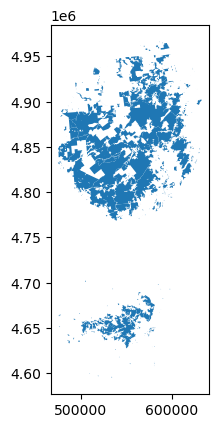

In [7]:
wild_lands.plot()

Every GeoDataFrame contains a special "geometry" column.  It contains all of the geometric objects that are displayed when we call the `plot()` method.

In [8]:
# View the first five entries in the "geometry" column
wild_lands.geometry.head()

0    POLYGON ((486093.245 4635308.586, 486787.235 4...
1    POLYGON ((491931.514 4637416.256, 491305.424 4...
2    POLYGON ((486000.287 4635834.453, 485007.550 4...
3    POLYGON ((541716.775 4675243.268, 541217.579 4...
4    POLYGON ((583896.043 4909643.187, 583891.200 4...
Name: geometry, dtype: geometry

While this column can contain a variety of different datatypes, each entry will typically be a **Point**, **LineString**, or **Polygon**.

![](https://storage.googleapis.com/kaggle-media/learn/images/N1llefr.png)

The "geometry" column in our dataset contains 2983 different Polygon objects, each corresponding to a different shape in the plot above.

In the code cell below, we create three more GeoDataFrames, containing campsite locations (**Point**), foot trails (**LineString**), and county boundaries (**Polygon**).

In [9]:
# Campsites in New York state (Point)
POI_data = gpd.read_file("../input/geospatial-learn-course-data/DEC_pointsinterest/DEC_pointsinterest/Decptsofinterest.shp")
campsites = POI_data.loc[POI_data.ASSET=='PRIMITIVE CAMPSITE'].copy()

# Foot trails in New York state (LineString)
roads_trails = gpd.read_file("../input/geospatial-learn-course-data/DEC_roadstrails/DEC_roadstrails/Decroadstrails.shp")
trails = roads_trails.loc[roads_trails.ASSET=='FOOT TRAIL'].copy()

# County boundaries in New York state (Polygon)
counties = gpd.read_file("../input/geospatial-learn-course-data/NY_county_boundaries/NY_county_boundaries/NY_county_boundaries.shp")

Next, we create a map from all four GeoDataFrames.  

The `plot()` method takes as (optional) input several parameters that can be used to customize the appearance.  Most importantly, setting a value for `ax` ensures that all of the information is plotted on the same map.

<AxesSubplot:>

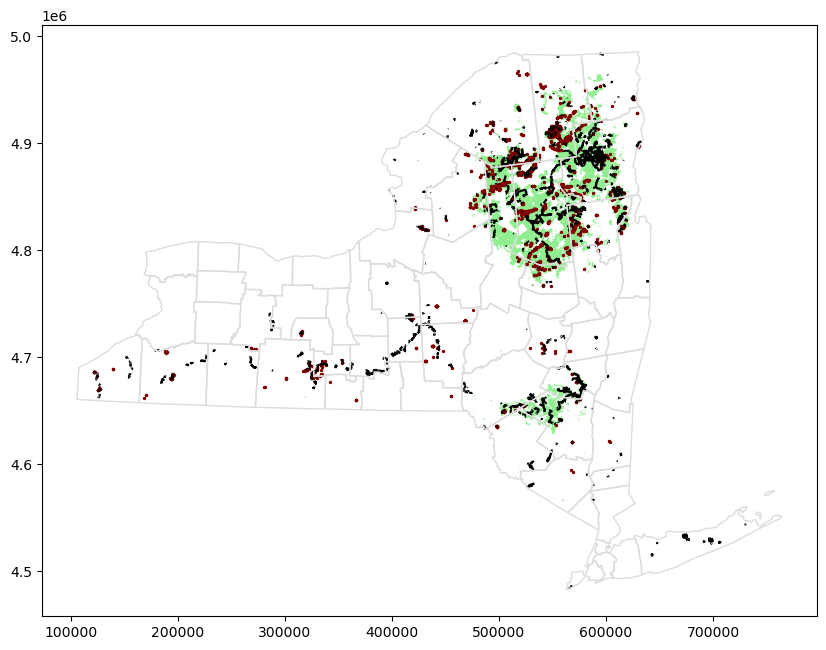

In [10]:
# Define a base map with county boundaries
ax = counties.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

# Add wild lands, campsites, and foot trails to the base map
wild_lands.plot(color='lightgreen', ax=ax)
campsites.plot(color='maroon', markersize=2, ax=ax)
trails.plot(color='black', markersize=1, ax=ax)

It looks like the northeastern part of the state would be a great option for a camping trip!

# Your turn

This feels complex at first, but you've already learned enough to do important analysis. See for yourself as you **[identify remote areas](https://www.kaggle.com/kernels/fork/5832167)** of the Philippines where a non-profit can expand its operations.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/geospatial-analysis/discussion) to chat with other learners.*